# Latar Belakang
Sebuah perusahaan yang bergerak di bidang maskapai, ingin meningkatkan layanan mereka agar banyak pelanggan tetap menggunakan layanan mereka untuk penerbangan berikutnya

asumsi 1 maskapai saja

# Pernyataan Masalah
Kita tidak tahu apakah pelanggan puas atau tidak menggunakan layanan maskapai kami, untuk menciptakan maskapai yang baik, tentu kita ingin meningkatkan layanan kami agar pelanggan dapat menjadikan maskapai kami sebagai maskapai favorit mereka

Sebagai seorang *data analyst*, kita akan mencoba menjawab pertanyaan berikut:

**Bagaimana karakteristik pelanggan yang puas akan layanan maskapai, dibandingkan dengan mereka yang tidak puas dan netral?**

In [1]:
# Basic
import numpy as np 
import pandas as pd 

# Visualization
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px 
import plotly.graph_objects as go 
from plotly.subplots import make_subplots

# Basic EDA for Airlane Passanger Satisfaction
- Gender: Gender of the passengers (Female, Male)
- Customer Type: The customer type (Loyal customer, disloyal customer)
- Age: The actual age of the passengers
- Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)
- Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)
- Flight distance: The flight distance of this journey
- Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)
- Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient
- Ease of Online booking: Satisfaction level of online booking
- Gate location: Satisfaction level of Gate location
- Food and drink: Satisfaction level of Food and drink
- Online boarding: Satisfaction level of online boarding
- Seat comfort: Satisfaction level of Seat comfort
- Inflight entertainment: Satisfaction level of inflight entertainment
- On-board service: Satisfaction level of On-board service
- Leg room service: Satisfaction level of Leg room service
- Baggage handling: Satisfaction level of baggage handling
- Check-in service: Satisfaction level of Check-in service
- Inflight service: Satisfaction level of inflight service
- Cleanliness: Satisfaction level of Cleanliness
- Departure Delay in Minutes: Minutes delayed when departure
- Arrival Delay in Minutes: Minutes delayed when Arrival
- Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('airline passanger satisfaction.csv', skipinitialspace=True)
df = df.drop('Unnamed: 0', axis=1)
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


## Data Understanding

Tak kenal maka tak sayang, sebelum kita mengolah data lebih lanjut, alangkah baiknya jika kita membedah data secara sederhana terlebih dahulu agar kita dapat mengetahui langkah selanjutnya

In [4]:
df.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [5]:
df.shape

(103904, 24)

In [6]:
listUnique = []
for i in df.columns:
    listUnique.append([i,df[i].nunique(),df[i].unique()])

tabelOfUniques = pd.DataFrame(columns=['Columns', 'Number of Unique', 'Uniques'], data=listUnique)
tabelOfUniques

,Columns,Number of Unique,Uniques
0,id,103904,"[70172, 5047, 110028, 24026, 119299, 111157, 8..."
1,Gender,2,"[Male, Female]"
2,Customer Type,2,"[Loyal Customer, disloyal Customer]"
3,Age,75,"[13, 25, 26, 61, 47, 52, 41, 20, 24, 12, 53, 3..."
4,Type of Travel,2,"[Personal Travel, Business travel]"
5,Class,3,"[Eco Plus, Business, Eco]"
6,Flight Distance,3802,"[460, 235, 1142, 562, 214, 1180, 1276, 2035, 8..."
7,Inflight wifi service,6,"[3, 2, 4, 1, 5, 0]"
8,Departure/Arrival time convenient,6,"[4, 2, 5, 3, 1, 0]"
9,Ease of Online booking,6,"[3, 2, 5, 4, 1, 0]"


In [7]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

Melalui data singkat ini, kita dapat mengambil beberapa kesimpulan singkat :
- data memiliki 103904 baris dan 24 kolom
- kolom `id` dapat dicuekan karena tidak memiliki nilai yang dapat diambil
- kolom `departure` dan `arrival` terjadi keanehan, karena `departure` menggunakan integer dan `arrival` menggunakan float, kita cukup mengganti `arrival` menjadi integer atau sebaliknya

## Data Cleaning
Sekarang kita memulai mengecek data-data yang menjadi kendala dalam *data science*, yaitu data kotor

In [8]:
df.isna().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

### Duplicate

In [9]:
df.duplicated(keep=False).sum()

0

kebetulan untuk data ini tidak memiliki data duplicate

### Outliers

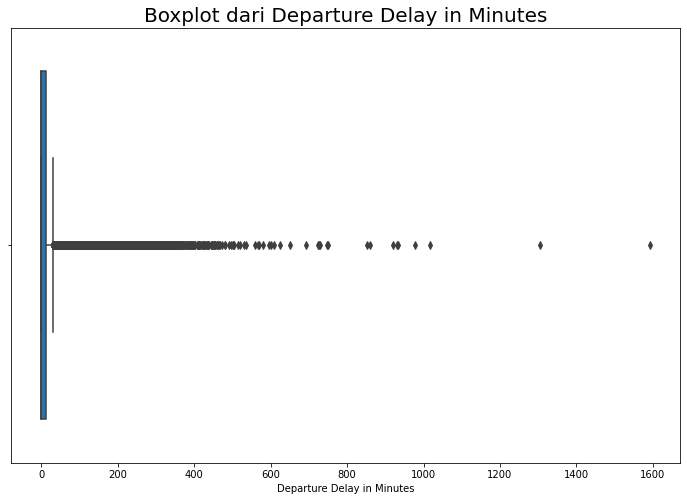

In [10]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x='Departure Delay in Minutes')
plt.title('Boxplot dari Departure Delay in Minutes', size=20)
plt.show()

In [11]:
# Upper Whisker
df['Departure Delay in Minutes'].describe().loc['75%'] + 1.5 * (df['Departure Delay in Minutes'].describe().loc['75%']-df['Departure Delay in Minutes'].describe().loc['25%'])

30.0

In [12]:
len(df[df['Departure Delay in Minutes']>30])

14529

In [13]:
(len(df[df['Departure Delay in Minutes']>30]) / len(df))*100

13.983099784416384

terlihat dari grafik diatas, outlier untuk kolom `Departure Delay in Minutes` terlihat cukup banyak, lebih tepatnya ada sebanyak 14.529 data atau sekitar 13.98%

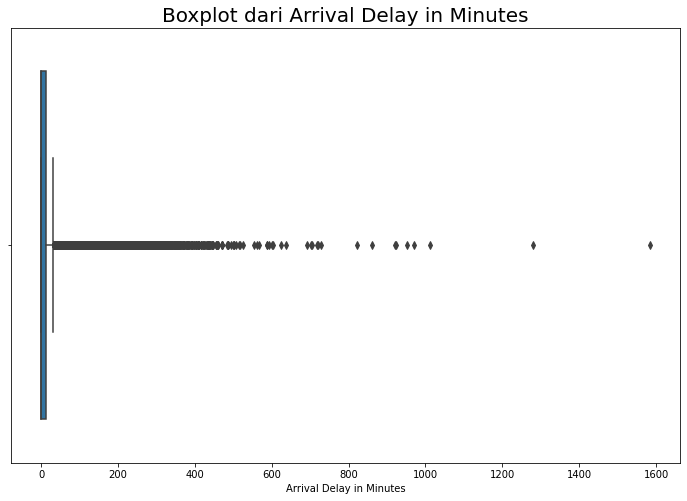

In [14]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x='Arrival Delay in Minutes')
plt.title('Boxplot dari Arrival Delay in Minutes', size=20)
plt.show()

In [15]:
# Upper Whisker
df['Arrival Delay in Minutes'].describe().loc['75%'] + 1.5 * (df['Arrival Delay in Minutes'].describe().loc['75%']-df['Arrival Delay in Minutes'].describe().loc['25%'])

32.5

In [16]:
len(df[df['Arrival Delay in Minutes']>30])

14662

In [17]:
(len(df[df['Arrival Delay in Minutes']>30]) / len(df))*100

14.11110255620573

Sedangkan untuk outliers `Arrival Delay in Minutes`, sedikit lebih banyak jika dibandingkan dengan `Departure Delay in Minutes`, yaitu 14.662 atau 14.11%

### Binning

dari semua data, yang memiliki nilai NaN Values hanya `Arrival Delay in Minutes`. Kita dapat memulai untuk membedah kolom tersebut

In [18]:
DelayGroup = []
for i in df['Departure Delay in Minutes']:
    if i <= 5 :
        DelayGroup.append('00-05')
    elif i <= 10 :
        DelayGroup.append('06-10')
    elif i <= 15 :
        DelayGroup.append('11-15')
    elif i <= 20 : 
        DelayGroup.append('16-20')
    elif i <= 25 :
        DelayGroup.append('21-25')
    elif i <= 30 :
        DelayGroup.append('26-30')
    elif i <= 35 : 
        DelayGroup.append('31-35')
    elif i <= 40 :
        DelayGroup.append('36-40')
    elif i <= 45 : 
        DelayGroup.append('41-45')
    elif i <= 50 :
        DelayGroup.append('46-50')
    elif i <= 55 :
        DelayGroup.append('51-55')
    else : 
        DelayGroup.append('55+')

df['DelayGroup'] = DelayGroup

In [19]:
df.groupby(['DelayGroup']).mean()['Arrival Delay in Minutes']

DelayGroup
00-05      2.201556
06-10      6.843191
11-15     10.326441
16-20     14.654707
21-25     19.223153
26-30     24.124945
31-35     29.627109
36-40     34.179074
41-45     39.953125
46-50     44.912214
51-55     49.242117
55+      116.002518
Name: Arrival Delay in Minutes, dtype: float64

### NaN Values

secara logika, jika kita mengalami keterlambatan dalam kepergian, maka kita juga akan mengalami keterlambatan dalam mendarat. Secara data pun juga terbukti bahwa dalam jarak 0-5 menit, secara rata-rata kita mengalami keterlambatan 2.2 menit, dan seterusnya. Oleh karena itu, NaN Values yang ada di `Arrival Delay in Minutes` akan saya isi rata-rata berdasarkan pengelompokan dari `Departure Delay in Minutes`

In [20]:
df['Arrival Delay in Minutes'] = df.groupby(['DelayGroup'])['Arrival Delay in Minutes'].apply(lambda x: x.fillna(x.mean()))

In [21]:
df['Departure Delay in Minutes']= df['Departure Delay in Minutes'].astype('float')

pada colom `Departure Delay in Minutes`, saya juga mengubah tipe datanya menjadi float untuk mengikuti data `Arrival Delay in Minutes` agar menjadi seragam

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

bisa dilihat sekarang bahwa semua NaN values sudah diisi sesuai dengan pengelompokan berdasarkan `DelayGroup`. sekarang sudah tidak ada data-data yang menjadi kendala, sekarang kita dapat memulai untuk melakukan analisis sederhana terhadap data ini

## Data Analysis
sekarang, kita sudah memasuki ke tahap analisis. Fokus dari analisis ini adalah untuk mencari ciri-ciri pelanggan *satisfied* dan *neutral or dissatisfied*

In [23]:
sns.set_theme(style="darkgrid", palette='deep')

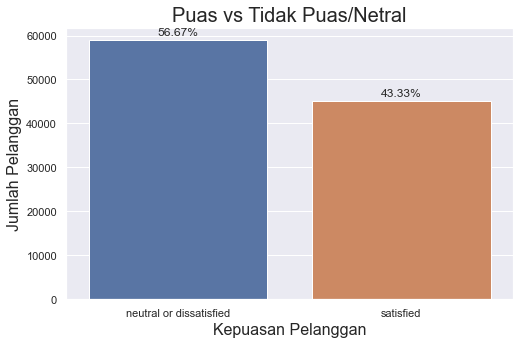

In [24]:
plt.figure(figsize=(8,5))

total = float(len(df))
ax = sns.countplot(x="satisfaction", data=df)
plt.title('Puas vs Tidak Puas/Netral', fontsize=20)
plt.xlabel('Kepuasan Pelanggan', size=16)
plt.ylabel('Jumlah Pelanggan', size=16)

# memperlihatkan persentase di barplot
for bar in ax.patches:
	ax.annotate('{:.2f}%'.format(100 * bar.get_height()/total),        
               (bar.get_x() + bar.get_width()/2,          
                bar.get_height()),                        
                ha='center',                             
                va='center',
                size=12, 
                xytext=(0, 8),                     
                textcoords='offset points')
plt.show()

Berdasarkan grafik diatas, dapat dilihat persentase pelanggan yang *satisfied* adalah 43.33%. Hal ini menunjukan bahwa tingkat kepuasan pelanggan masih membutuhkan peningkatan. Hal ini dapat ditunjang dengan mengetahui terlebih dahulu faktor apa saja yang mempengaruhi kepuasan pelanggan.

### Simple Function

In [25]:
# Fucntion untuk countplot sederhana something vs something
def countplot_vs(data_x, data_y, order_x):
    plt.figure(figsize=(8,5))
    total = float(len(df))
    ax = sns.countplot(data=df, x=data_x, hue=data_y, order=order_x)
    plt.title(f'{data_y} berdasarkan {data_x}', fontsize=20)


# memindahkan legend
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# memperlihatkan persentase di barplot
    for bar in ax.patches:
     ax.annotate('{:.2f}%'.format(100 * bar.get_height()/total),        
               (bar.get_x() + bar.get_width()/2,          
                bar.get_height()),                        
                ha='center',                             
                va='center',
                size=12, 
                xytext=(0, 8),                     
                textcoords='offset points')

In [26]:
# function sederhana untuk membagi 2 countplot
def countplot_per_bus(data_x, order_x):
    sns.catplot(data=df, 
                    x=data_x, 
                    hue='satisfaction',
                    col='Type of Travel', 
                    kind='count', 
                    order=order_x)


    plt.suptitle(f'Satisfaction berdasarkan {data_x} dipisah Type of Travel', y=1.05, size=20);

In [27]:
def countplot_survey(data_x):
    plt.figure(figsize=(8,6))
    sns.countplot(data=df, x=data_x, color='#fc8d59')
    plt.title(f'Jumlah per nilai {data_x}', size=15)
    plt.show()

In [28]:
# function sederhana untuk pivot table
def pivots(data, kolom) :

    df_pivot = data.pivot_table(
        index = 'satisfaction',
        columns = kolom, 
        values = 'id', 
        aggfunc= len
    )
    df_pivot.loc['Total'] = df_pivot.sum()
    df_pivot.loc[r'% of satisfied'] = (df_pivot.loc['satisfied']/df_pivot.loc['Total']*100).round(2)

    return df_pivot

### Gender

In [29]:
df_pivot_gender = pivots(df, 'Gender')
df_pivot_gender

Gender,Female,Male
satisfaction,,
neutral or dissatisfied,30193.00,28686.00
satisfied,22534.00,22491.00
Total,52727.00,51177.00
% of satisfied,42.74,43.95


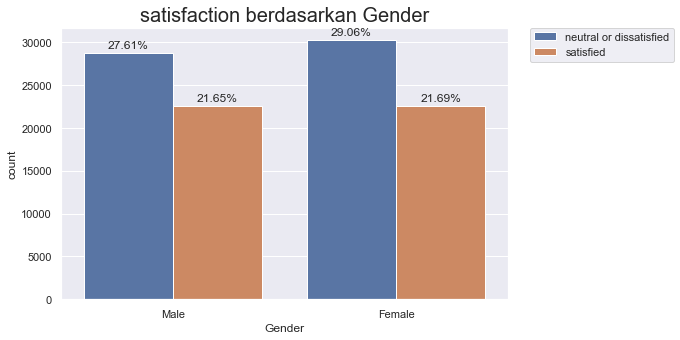

In [30]:
countplot_vs('Gender', 'satisfaction', None)

melalui dari grafik diatas, kita mengetahui bahwa gender tidak berhubungan dalam penilaian satisfaction. Selanjutnya saya akan menguji menggunakan chi-square untuk membuktikan pernyataan diatas

In [31]:
#Chi-Squared
from scipy.stats import chi2_contingency

In [32]:
stat, pvalue, dof, expected = chi2_contingency(pivots(df, 'Gender'))

pvalue

0.0013916621566691517

In [33]:
from statsmodels.stats.proportion import proportions_ztest

In [34]:
# Z-Test
stat, pvalue = proportions_ztest(
    count= [df_pivot_gender.loc['satisfied','Female'], df_pivot_gender.loc['satisfied','Male']], 
    nobs= [df_pivot_gender.sum()['Female'], df_pivot_gender.sum()['Male']],  
    alternative='two-sided'
)

pvalue

0.0008234680278405927

- Ho : Gender tidak terkait dengan satisfaction (independent)
- Ha : Gender terkait dengan satisfaction (dependent) <br>
Berdasarkan uji Chi-Squared dan Z-test, Pvalue kurang dari 0.05. Ternyata Gender terkait dengan kepuasan pelanggan, oleh karena itu, kita harus meningkatkan layanan maskapai untuk dapat membuat perempuan puas terhadap layanan kami

### Customer Type

In [35]:
pivots(df, 'Customer Type')

Customer Type,Loyal Customer,disloyal Customer
satisfaction,,
neutral or dissatisfied,44390.00,14489.00
satisfied,40533.00,4492.00
Total,84923.00,18981.00
% of satisfied,47.73,23.67


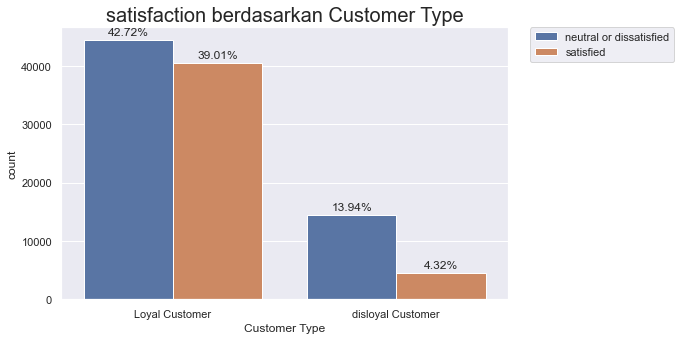

In [36]:
countplot_vs('Customer Type','satisfaction', None)

berdasarkan grafik diatas, terlihat bahwa sebagian besar *disloyal customer* tidak puas dengan layanan yang ada di dalam maskapai. Hal ini cukup masuk akal dikarenakan mereka adalah pelanggan yang tidak setia, akan tetapi perlu diperhatikan pada bagian *loyal customer* dimana lebih banyak orang yang memilih *neutral or dissatisfied*. Hal ini menjadi masalah karena berkat para pelanggan setia kita tetap bisa beroperasi

### Age
*'Birds of feather flocks together'*, peribahasa ini memiliki arti individu yang memiliki tipe yang sama atau sifat yang sama akan mendekati satu sama lain. Oleh karena itu saya akan mengelompokkan umur per 10 tahun untuk melihat apakah mereka akan lebih memilih *satisfied* atau *neutral or dissatisfied*.

In [37]:
AgeGroup = []
for i in df['Age']:
    if i <= 10 :
        AgeGroup.append('00-10')
    elif i <= 20 :
        AgeGroup.append('11-20')
    elif i <= 30 :
        AgeGroup.append('21-30')
    elif i <= 40 : 
        AgeGroup.append('31-40')
    elif i <= 50 :
        AgeGroup.append('41-50')
    elif i <= 60 :
        AgeGroup.append('51-60')
    elif i <= 70 : 
        AgeGroup.append('61-70')
    else : 
        AgeGroup.append('70+')

df['AgeGroup'] = AgeGroup

In [38]:
pivots(df, 'AgeGroup')

AgeGroup,00-10,11-20,21-30,31-40,41-50,51-60,61-70,70+
satisfaction,,,,,,,,
neutral or dissatisfied,2267.00,6842.00,13664.00,12019.00,9743.0,8030.00,5772.00,542.00
satisfied,310.00,1914.00,7760.00,9184.00,13456.0,10739.00,1448.00,214.00
Total,2577.00,8756.00,21424.00,21203.00,23199.0,18769.00,7220.00,756.00
% of satisfied,12.03,21.86,36.22,43.31,58.0,57.22,20.06,28.31


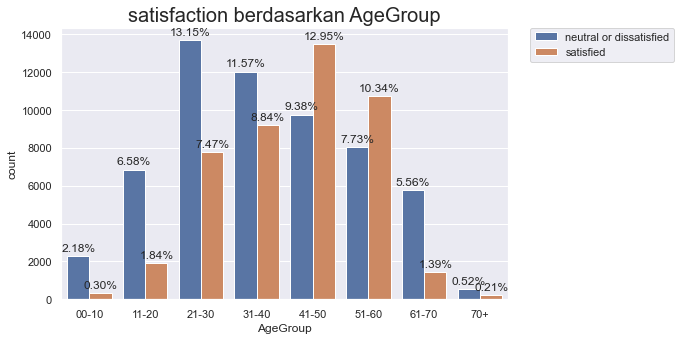

In [39]:
countplot_vs('AgeGroup','satisfaction', ['00-10','11-20','21-30','31-40','41-50','51-60','61-70','70+'])

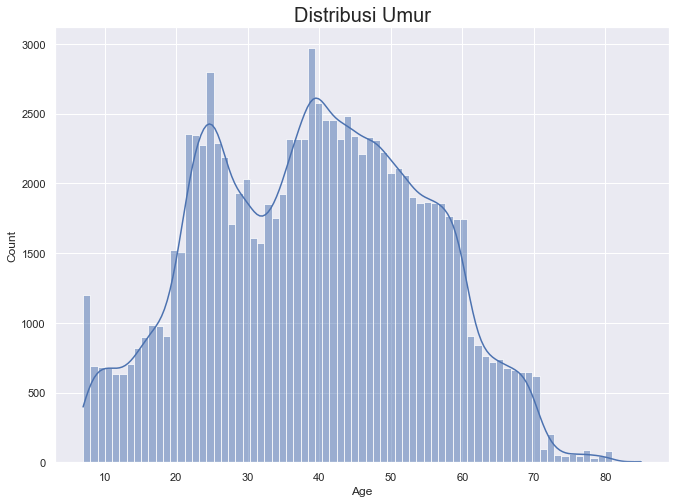

In [40]:
plt.figure(figsize=(11,8))
plt.title('Distribusi Umur', size=20)
sns.histplot(data=df, x='Age', kde=True)
plt.show()

jika dilihat dari persebaran data, maskapai kita lebih banyak menerima tamu dari range umur 20-60
- Terlihat pada umur 40-60, lebih banyak pelanggan yang memilih puas akan layanan yang ada
- sedangkan pada umur 20-40, lebih banyak yang memilih tidak puas atau netral terhadap layanan maskapai kita<br>
Untuk umur 20 kebawah dikarenakan mereka belum cukup dewasa, ada kemungkinan saat mengisi survey, mereka dipengaruhi oleh orang tua/penjaga mereka.

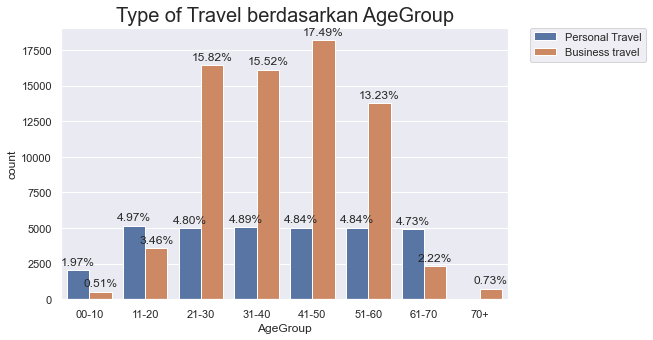

In [41]:
countplot_vs('AgeGroup','Type of Travel', ['00-10','11-20','21-30','31-40','41-50','51-60','61-70','70+'])

Dari `AgeGroup` 21-60 memiliki persebaran data `Type of Travel` yang relatif sama, yaitu *Business Class*. Sedangkan

### Type of Travel

In [42]:
pivots(df, 'Type of Travel')

Type of Travel,Business travel,Personal Travel
satisfaction,,
neutral or dissatisfied,29909.00,28970.00
satisfied,41746.00,3279.00
Total,71655.00,32249.00
% of satisfied,58.26,10.17


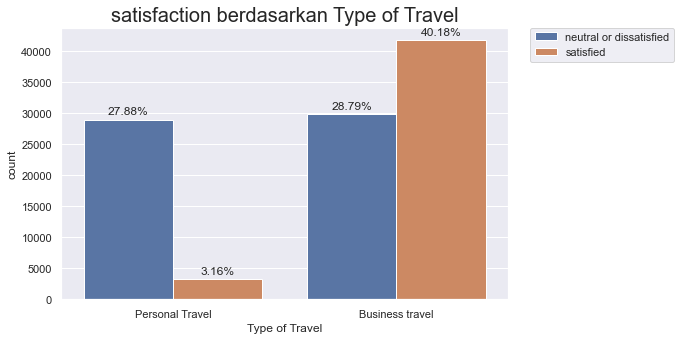

In [43]:
countplot_vs('Type of Travel','satisfaction', None)

Jika dilihat sekilas, terlihat bahwa pelanggan utama maskapai ini adalah para pembisnis. Meski banyak dari mereka yang merasakan puas saat menggunakan maskapai kita, pelanggan yang merasakan tidak puas juga tidak dapat bisa dibilang sedikit. Dapat dilihat juga untuk *Personal Travel* bahwa majoritas dari mereka tidak begitu menyukai layanan maskapai kita.

### Class

In [44]:
pivots(df, 'Class')

Class,Business,Eco,Eco Plus
satisfaction,,,
neutral or dissatisfied,15185.00,38044.00,5650.00
satisfied,34480.00,8701.00,1844.00
Total,49665.00,46745.00,7494.00
% of satisfied,69.43,18.61,24.61


In [45]:
(46745+7494)

54239

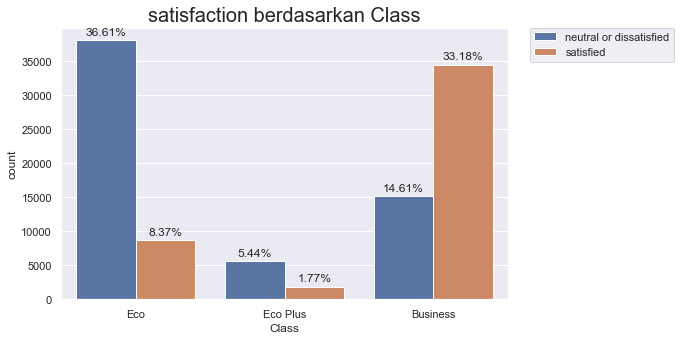

In [46]:
countplot_vs('Class','satisfaction', ['Eco', 'Eco Plus', 'Business'])

Hal ini wajar jika kelas *Eco* yang menerima nilai *neutral or dissatisfied* lebih tinggi dibadingkan *satisfied*, dikarenakan pelanggan terbanyak kita berdasarkan data sejauh ini adalah *Business Travel* 

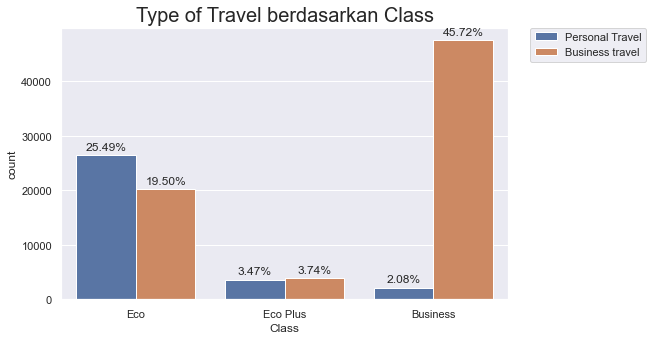

In [47]:
countplot_vs('Class','Type of Travel', ['Eco', 'Eco Plus', 'Business'])

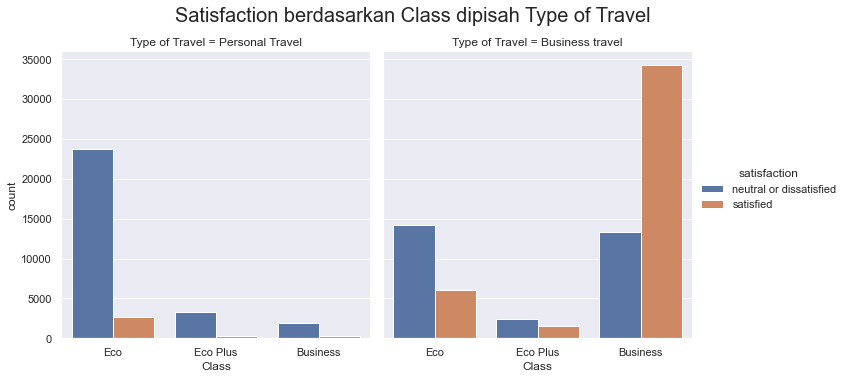

In [48]:
countplot_per_bus('Class', ['Eco', 'Eco Plus', 'Business'])

Disini terlihat adanya beberapa pelanggan yang menggunakan kelas *Eco* dan *Eco Plus* untuk kepentingan bisnis, untuk membuat pengalaman terbang bersama maskapai kami lebih baik, bisa ditawarkan untuk menaikan kelasnya ke *Business* pada saat awal pembelian tiket

### Flight Distance

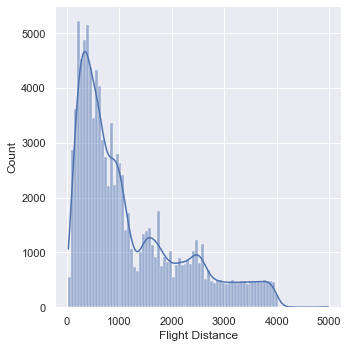

In [49]:
sns.displot(data=df, x='Flight Distance', kde=True);

Jika kita menggunakan data rata-rata kecepatan [500 miles per hour](https://www.flightdeckfriend.com/ask-a-pilot/how-fast-do-commercial-aeroplanes-fly#:~:text=A%20typical%20commercial%20passenger%20jet,the%20faster%20it%20can%20travel.), maka maskapai ini memiliki frekuensi tertinggi pada penerbangan dibawah [3 jam](https://www.pointhacks.com.au/differences-short-medium-long-haul-flights/#h-what-is-considered-a-short-haul-medium-haul-and-long-haul-flight). Dapat dibilang bahwa pusat bisnis maskapai ini ada pada penerbangan jangka pendek

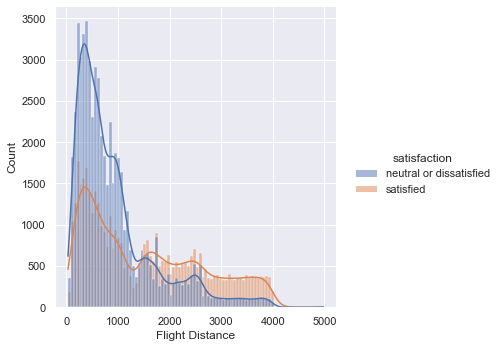

In [50]:
sns.displot(data=df, x='Flight Distance', hue='satisfaction', kde=True);

Pembagian kelas lamanya jam terbang dapat di cek di [sini](https://www.pointhacks.com.au/differences-short-medium-long-haul-flights/#h-what-is-considered-a-short-haul-medium-haul-and-long-haul-flight)

In [51]:
FlightGroup = []
for i in df['Flight Distance']:
    if i < 500*3 :
        FlightGroup.append('Short Flight')
    elif i < 500*6 : 
        FlightGroup.append('Medium Flight')
    else :
        FlightGroup.append('Long Fight')

df['FlightGroup'] = FlightGroup

In [52]:
pivots(df, 'FlightGroup')

FlightGroup,Long Fight,Medium Flight,Short Flight
satisfaction,,,
neutral or dissatisfied,1868.00,8873.00,48138.00
satisfied,6405.00,14364.00,24256.00
Total,8273.00,23237.00,72394.00
% of satisfied,77.42,61.82,33.51


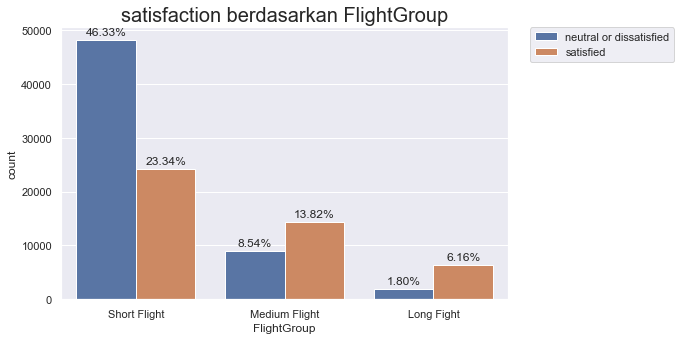

In [53]:
countplot_vs('FlightGroup','satisfaction', None)

sepertinya untuk penerbangan jangka panjang, lebih banyak pelanggan yang merasa puas akan pelayanan yang ada di dalam pesawat, sayangnya kita tidak memiliki data yang menunjukan bahwa pesawat yang digunakan untuk penerbangan short, medium dan long sama atau tidak

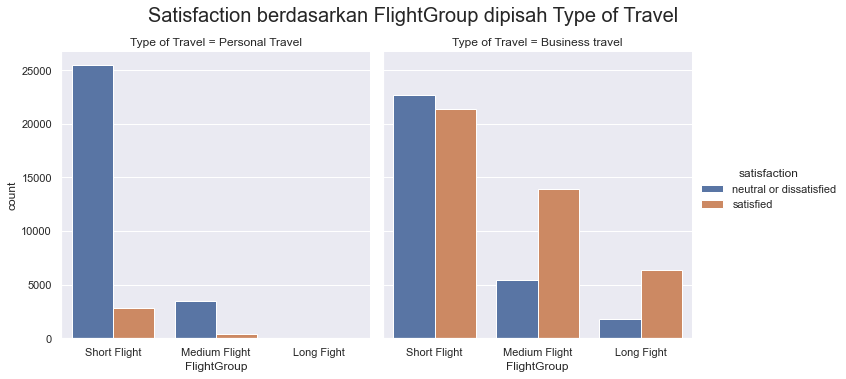

In [54]:
countplot_per_bus('FlightGroup', None)

- Personal Travel<br>
sekali lagi terlihat bahwa dalam *Personal Travel* majoritas dari mereka merasa tidak puas akan layanan yang ada didalam pesawat
- Business Travel<br>
sedangkan untuk *Business Travel* untuk *Medium Flight* dan *Long Flight* hampir sebagian besar dari mereka sudah puas akan layanan yang ada. Hanya saja dalam *Short Flight* terlihat bahwa mereka seimbang

In [55]:
df_short = df[(df['Type of Travel']=='Business travel') & (df['FlightGroup']=='Short Flight')]

In [56]:
df_short.groupby('satisfaction').count()[['id']].loc['satisfied'][0]

21405

kita menggunakan Z-test one sample untuk mengetahui apakah Short Flight untuk Business Travel berbeda signifikan atau tidak

In [57]:
from statsmodels.stats.proportion import proportions_ztest

In [58]:
stat,pvalue=proportions_ztest(
    count = df_short.groupby('satisfaction').count()[['id']].loc['satisfied'][0], # jumlah buku fiksi
    nobs = len(df_short), # jumlah data/sample
    value = 0.5
)
pvalue

1.2766921661694221e-09

- Ho : jumlah satisfied = jumlah neutral or dissatisfied
- Ha : jumlah satisfied != jumlah neutral or dissatisfied<br>
Karena Pvalue > 0.05, kita gagal menolak Ho, kita tidak memiliki cukup bukti untuk mengatakan bahwa jumlah penumpang yang satisfied dan dissatisfied berbeda signifikan. (Khusus untuk yang Short Flight di Business Travel).
artinya Short Flight di Business Travel tidak berkaitan dengan `satisfaction`

### Pembagian Data
Untuk mempermudah analisis antara *Personal* dan *Business* *Travel*, data utama akan saya bagi berdasarkan karakter `Type of Travel`

In [59]:
df_personal = df[df['Type of Travel']=='Personal Travel']
df_business = df[df['Type of Travel']=='Business travel']

### Inflight wifi service	

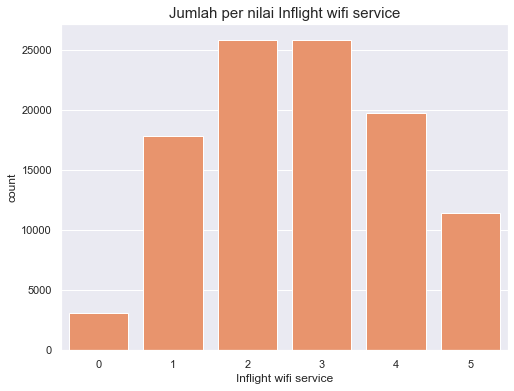

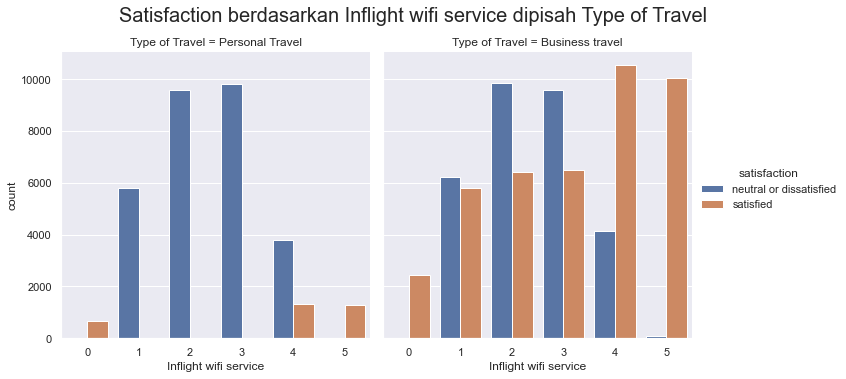

In [60]:
countplot_survey('Inflight wifi service')
countplot_per_bus('Inflight wifi service',None)

In [61]:
pivots(df_personal, 'Inflight wifi service')

Inflight wifi service,0,1,2,3,4,5
satisfaction,,,,,,
neutral or dissatisfied,NaN,5807.0,9575.0,9800.0,3788.00,NaN
satisfied,651.0,NaN,NaN,NaN,1327.00,1301.0
Total,651.0,5807.0,9575.0,9800.0,5115.00,1301.0
% of satisfied,100.0,NaN,NaN,NaN,25.94,100.0


In [62]:
pivots(df_business, 'Inflight wifi service')

Inflight wifi service,0,1,2,3,4,5
satisfaction,,,,,,
neutral or dissatisfied,8.00,6227.00,9832.00,9586.00,4150.00,106.00
satisfied,2444.00,5806.00,6423.00,6482.00,10529.00,10062.00
Total,2452.00,12033.00,16255.00,16068.00,14679.00,10168.00
% of satisfied,99.67,48.25,39.51,40.34,71.73,98.96


- *All Type* memilih nilai **2** dan **3**
- *Personal Travel* kebanyak mengisi **1**, **2** dan **3** dan semuanya **neutral or dissatisfied**, bahkan di nilai **4** pun, lebih banyak yang **neutral or dissatisfied**
- *Business Travel* pun juga kebanyakan memilih **2** dan **3**, meski pada nilai ke **4** terjadi penurunan dari para pelanggan yang *neutral or dissatisfied*

### Departure/Arrival time convenient	

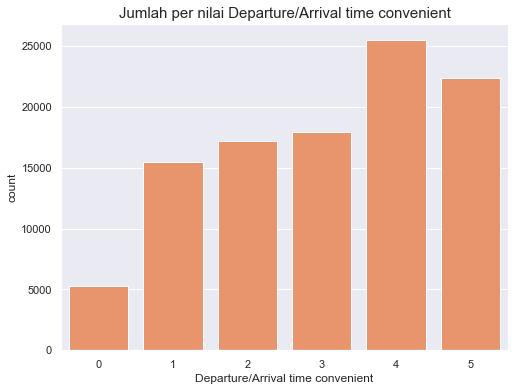

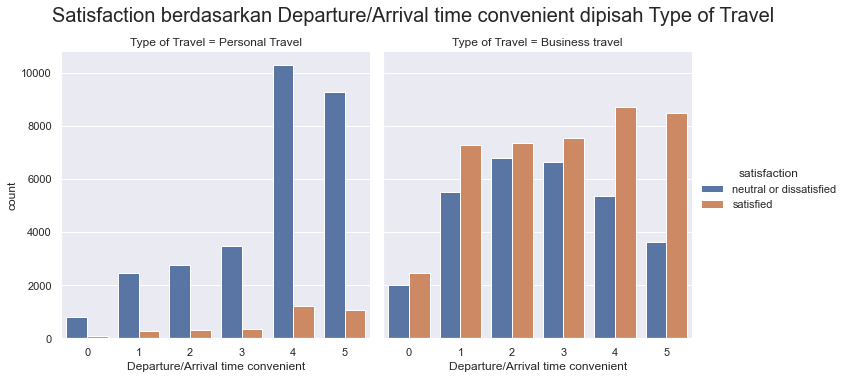

In [63]:
countplot_survey('Departure/Arrival time convenient')
countplot_per_bus('Departure/Arrival time convenient', None)

In [64]:
pivots(df_personal, 'Departure/Arrival time convenient')

Departure/Arrival time convenient,0,1,2,3,4,5
satisfaction,,,,,,
neutral or dissatisfied,788.00,2444.00,2752.00,3458.0,10268.00,9260.00
satisfied,81.00,284.00,309.00,342.0,1202.00,1061.00
Total,869.00,2728.00,3061.00,3800.0,11470.00,10321.00
% of satisfied,9.32,10.41,10.09,9.0,10.48,10.28


In [65]:
pivots(df_business, 'Departure/Arrival time convenient')

Departure/Arrival time convenient,0,1,2,3,4,5
satisfaction,,,,,,
neutral or dissatisfied,1992.00,5513.00,6782.0,6635.00,5372.00,3615.00
satisfied,2439.00,7257.00,7348.0,7531.00,8704.00,8467.00
Total,4431.00,12770.00,14130.0,14166.00,14076.00,12082.00
% of satisfied,55.04,56.83,52.0,53.16,61.84,70.08


- *All Type* Majoritas memilih **4** dan **5** 
- *Personal Travel* meski mereka *neutral or dissatisfied* akan tetapi majoritas memilih **4** dan **5**
- *Business Travel* bahkan mereka yang *satisfied* cukup banyak memilih nilai **1**, **2** dan **3**, meski nilai **4** dan **5** lebih banyak 

### Ease of Online booking	

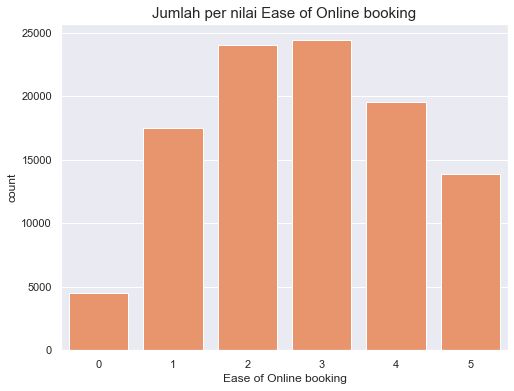

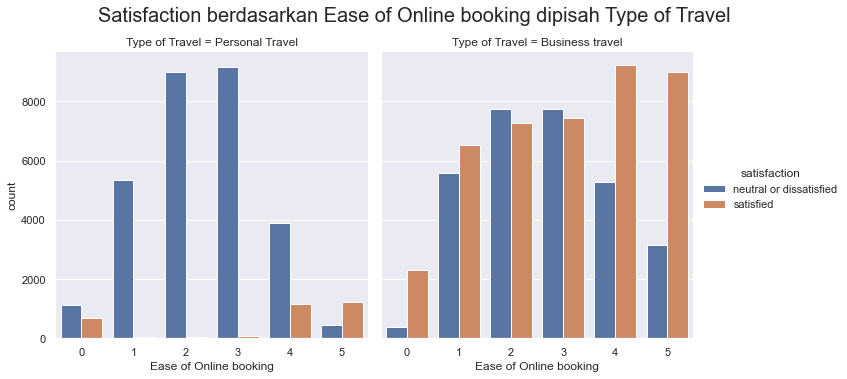

In [66]:
countplot_survey('Ease of Online booking')
countplot_per_bus('Ease of Online booking', None)

In [67]:
pivots(df_personal, 'Ease of Online booking')

Ease of Online booking,0,1,2,3,4,5
satisfaction,,,,,,
neutral or dissatisfied,1118.0,5355.00,8990.00,9157.00,3892.00,458.00
satisfied,688.0,58.00,33.00,93.00,1173.00,1234.00
Total,1806.0,5413.00,9023.00,9250.00,5065.00,1692.00
% of satisfied,38.1,1.07,0.37,1.01,23.16,72.93


In [68]:
pivots(df_business, 'Ease of Online booking')

Ease of Online booking,0,1,2,3,4,5
satisfaction,,,,,,
neutral or dissatisfied,389.00,5580.00,7730.00,7755.00,5288.00,3167.00
satisfied,2292.00,6532.00,7268.00,7444.00,9218.00,8992.00
Total,2681.00,12112.00,14998.00,15199.00,14506.00,12159.00
% of satisfied,85.49,53.93,48.46,48.98,63.55,73.95


- *All Type* Majoritas memilih **2** dan **3** 
- *Personal Travel* dapat dibilang mereka memilih netral dikarenakan mayoritas mereka memilih nilai **2** dan **3**. Terlihat adanya kenaikan pada nilai **5** bagi mereka yang *satisfied* dengan layanan ini
- *Business Travel*  dapat dibilang mereka memilih netral dikarenakan mayoritas mereka memilih nilai **2** dan **3**

### Gate location	

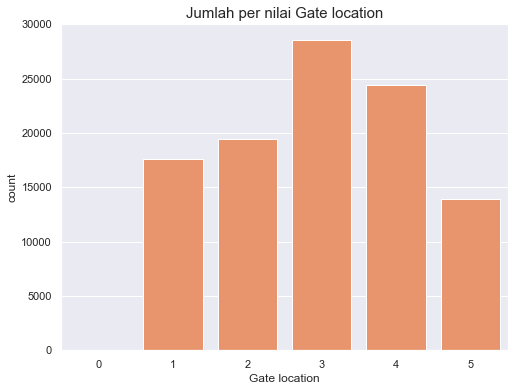

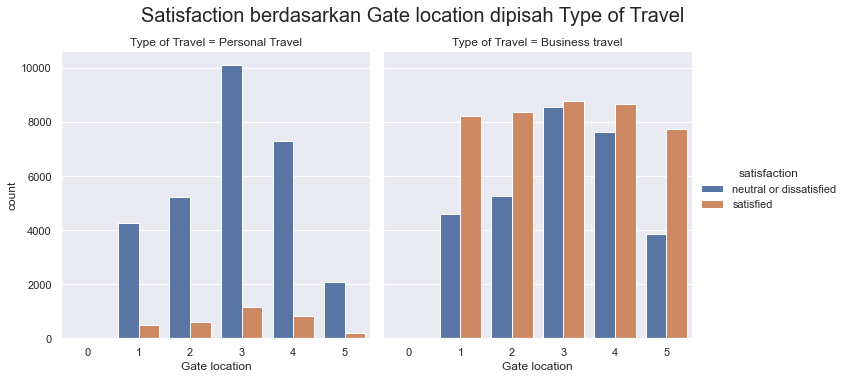

In [69]:
countplot_survey('Gate location')
countplot_per_bus('Gate location', None)

In [70]:
pivots(df_personal, 'Gate location')

Gate location,1,2,3,4,5
satisfaction,,,,,
neutral or dissatisfied,4258.00,5227.00,10094.00,7313.00,2078.00
satisfied,497.00,605.00,1141.00,830.00,206.00
Total,4755.00,5832.00,11235.00,8143.00,2284.00
% of satisfied,10.45,10.37,10.16,10.19,9.02


In [71]:
pivots(df_business, 'Gate location')

Gate location,0,1,2,3,4,5
satisfaction,,,,,,
neutral or dissatisfied,NaN,4601.00,5267.00,8561.00,7623.00,3857.00
satisfied,1.0,8206.00,8360.00,8781.00,8660.00,7738.00
Total,1.0,12807.00,13627.00,17342.00,16283.00,11595.00
% of satisfied,100.0,64.07,61.35,50.63,53.18,66.74


- *All Travel* untuk bagian ini sedikit dari yang lain dikarenakan tidak ada yang memilih nilai **0**, tetapi mayoritas ada di **3**
- *Personal Travel* banyak yang memilih **3**
- *Business Travel* untuk yang *satisfied* dapat dibilang relatif sama untuk semua nilai, akan tetapi untuk *neutral or dissatisfied* memilih nilai **3** dan **4**

### Food and drink	

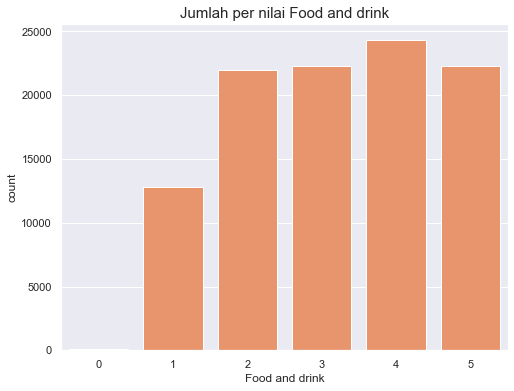

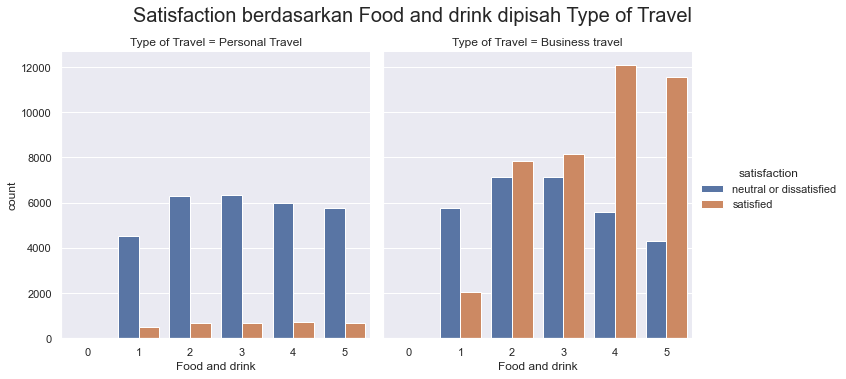

In [72]:
countplot_survey('Food and drink')
countplot_per_bus('Food and drink', None)

In [73]:
pivots(df_personal, 'Food and drink')

Food and drink,0,1,2,3,4,5
satisfaction,,,,,,
neutral or dissatisfied,34.00,4520.00,6312.00,6340.00,5987.00,5777.00
satisfied,18.00,506.00,668.00,674.00,715.00,698.00
Total,52.00,5026.00,6980.00,7014.00,6702.00,6475.00
% of satisfied,34.62,10.07,9.57,9.61,10.67,10.78


In [74]:
pivots(df_business, 'Food and drink')

Food and drink,0,1,2,3,4,5
satisfaction,,,,,,
neutral or dissatisfied,23.00,5749.0,7146.00,7121.00,5584.00,4286.00
satisfied,32.00,2062.0,7862.00,8165.00,12073.00,11552.00
Total,55.00,7811.0,15008.00,15286.00,17657.00,15838.00
% of satisfied,58.18,26.4,52.39,53.41,68.38,72.94


- *All Travel* dapat dibilang nilai **2,3,4** dan **5** relatif sama
- *Personal Travel* setiap nilai hampir memiliki jumlah yang sama baik dari mereka yang *satisfied* dan *dissatisfied and neutral*
- *Business Travel* pelanggan yang *dissatisfied and neutral* majoritas memilih nilai *2* dan *3*

### Online boarding

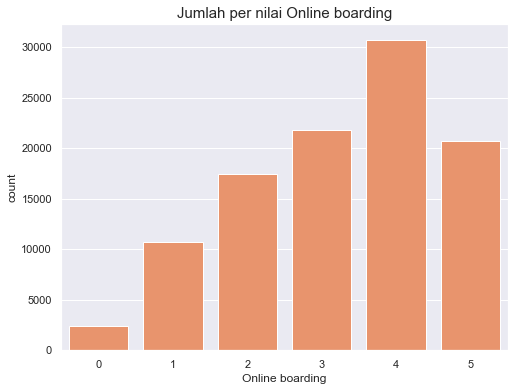

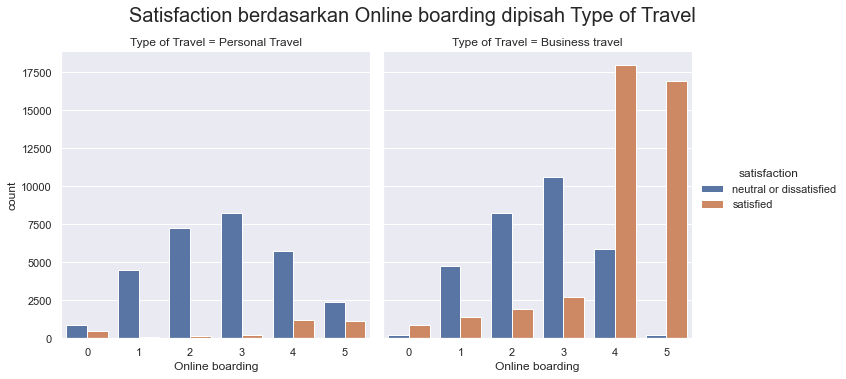

In [75]:
countplot_survey('Online boarding')
countplot_per_bus('Online boarding', None)

In [76]:
pivots(df_personal, 'Online boarding')

Online boarding,0,1,2,3,4,5
satisfaction,,,,,,
neutral or dissatisfied,850.00,4471.0,7275.00,8229.00,5728.00,2417.00
satisfied,486.00,96.0,124.00,226.00,1224.00,1123.00
Total,1336.00,4567.0,7399.00,8455.00,6952.00,3540.00
% of satisfied,36.38,2.1,1.68,2.67,17.61,31.72


In [77]:
pivots(df_business, 'Online boarding')

Online boarding,0,1,2,3,4,5
satisfaction,,,,,,
neutral or dissatisfied,227.00,4748.00,8211.00,10616.00,5868.00,239.00
satisfied,865.00,1377.00,1895.00,2733.00,17942.00,16934.00
Total,1092.00,6125.00,10106.00,13349.00,23810.00,17173.00
% of satisfied,79.21,22.48,18.75,20.47,75.35,98.61


- *All Travel* majoritas memilih nilai **4**
- *Personal Travel* banyak yang memilih **3**, bahkan ada yang *satisfied* tetapi memilih nilai **0**
- *Business Travel* terlihat adanya penurunan sigfinikan dari nilai **3** ke **4** dari mereka yang *neutral and dissatisfied* dan kenaikan signifikan dari nilai **3** ke **4** *satisfied*

### Seat comfort	

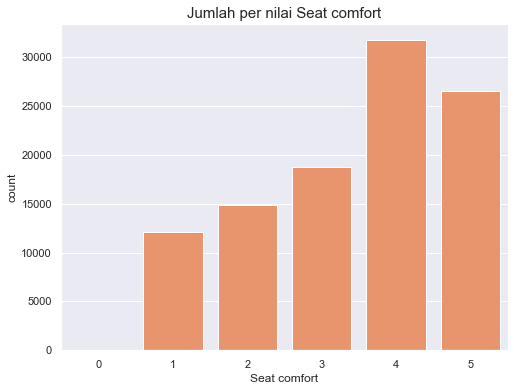

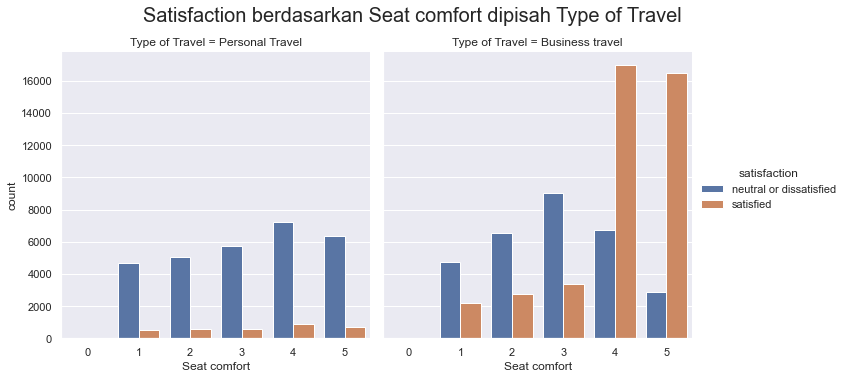

In [78]:
countplot_survey('Seat comfort')
countplot_per_bus('Seat comfort', None)

- *All Travel* majoritas memilih **4** dan **5**
- *Personal Travel* meski *neutral or dissatisfied*, mereka tetap memilih **4** dan **5**, walaupun yang nilai rendah tidak dapat dibilang sedikit
- *Business Travel* terlihat adanya penurunan sigfinikan dari nilai **3** ke **4** dari mereka yang *neutral and dissatisfied* dan kenaikan signifikan dari nilai **3** ke **4** *satisfied*

### Inflight entertainment	

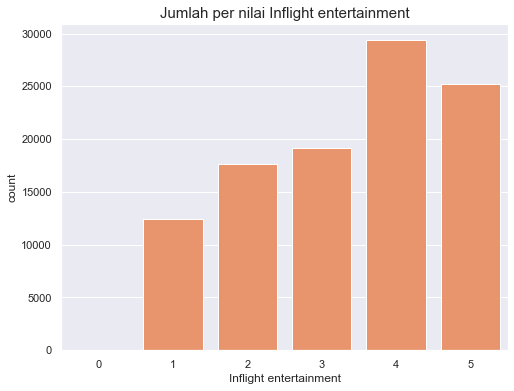

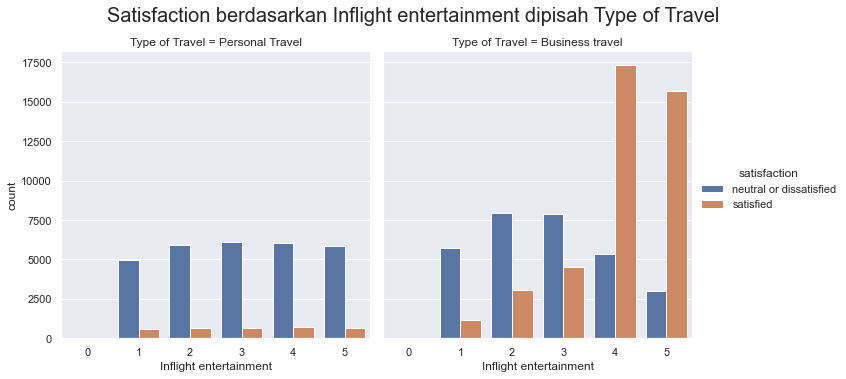

In [79]:
countplot_survey('Inflight entertainment')
countplot_per_bus('Inflight entertainment', None)

- *All Travel* majoritas memilih **4** dan **5** dan terlihat tidak ada yang memilih nilai **0**
- *Personal Travel* meski *neutral or dissatisfied*, mereka tetap memilih **4** dan **5**, walaupun yang nilai **1** tidak dapat dibilang sedikit
- *Business Travel* terlihat adanya penurunan sigfinikan dari nilai **3** ke **4** dari mereka yang *neutral and dissatisfied* dan kenaikan signifikan dari nilai **3** ke **4** *satisfied*

### On-board service	

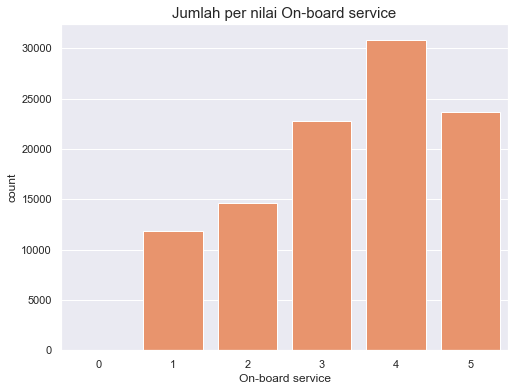

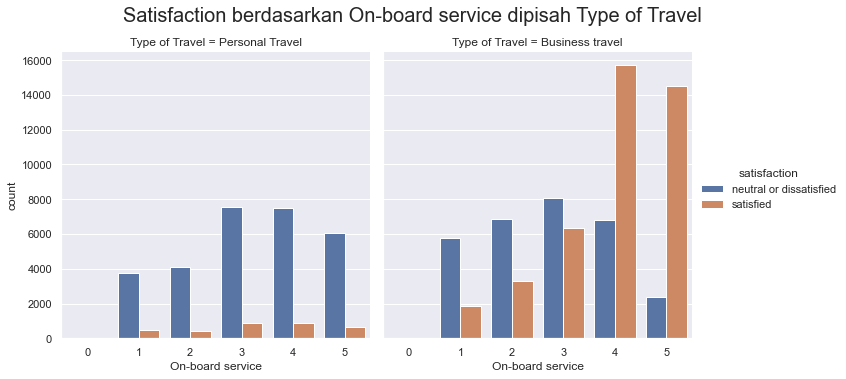

In [80]:
countplot_survey('On-board service')
countplot_per_bus('On-board service', None)

- *All Travel* majoritas memilih **4**
- *Personal Travel* banyak yang memilih **3**, **4** dan **5**, meski mereka *neutral or dissatisfied* 
- *Business Travel* terlihat adanya penurunan sigfinikan dari nilai **4** ke **5** dari mereka yang *neutral and dissatisfied* dan kenaikan signifikan dari nilai **3** ke **4** *satisfied*

### Leg room service

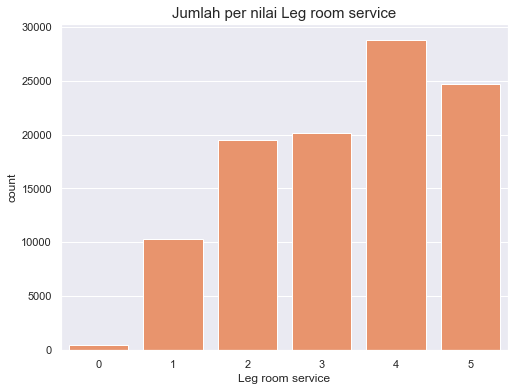

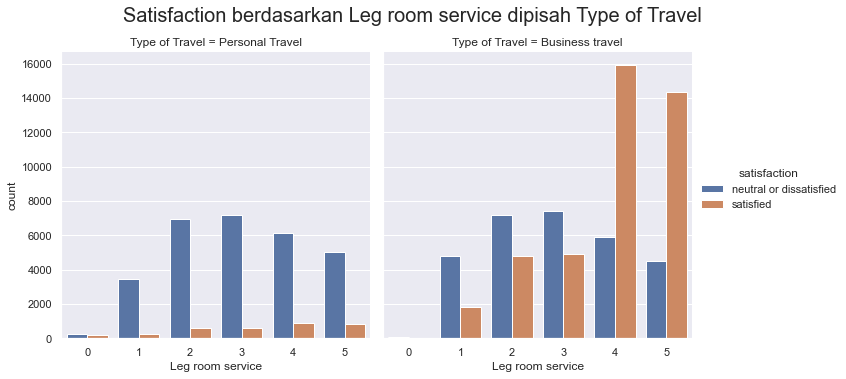

In [81]:
countplot_survey('Leg room service')
countplot_per_bus('Leg room service', None)

- *All Travel* dapat dikatakan baik dikarenakan majoritas menilai tinggi
- *Personal Travel* mengingat banyaknya pengguna *eco* untuk *personal*, dapat diakatan memiliki `leg room` yang berbeda dari *business travel*
- *Business Travel* dikarenakan lebih banyak pengguna kelas *business*, lebih banyak pelanggan yang *satisfied* dengan layanan ini

### Baggage handling	

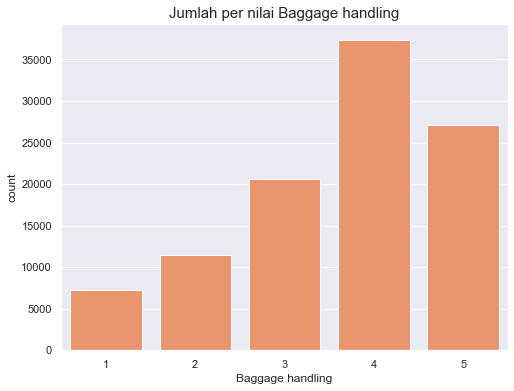

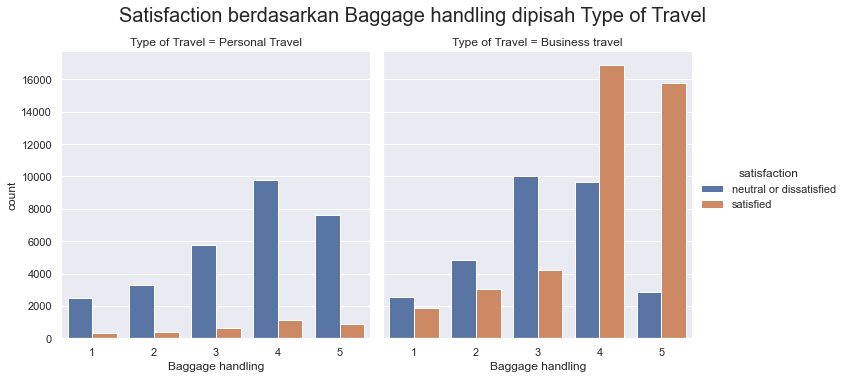

In [82]:
countplot_survey('Baggage handling')
countplot_per_bus('Baggage handling', None)

- *All Travel* majoritas memilih nilai *4*
- *Personal Travel* masih banyak pelanggan yang *neutral or dissatisfied* yang tetap memilih nilai tinggi
- *Business Travel* masih banyak pelanggan yang *neutral or dissatisfied* yang tetap memilih nilai tinggi

### Checkin service	

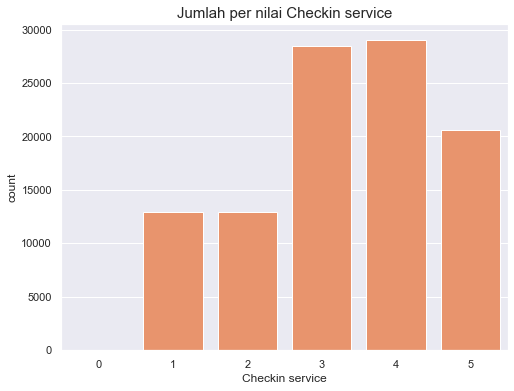

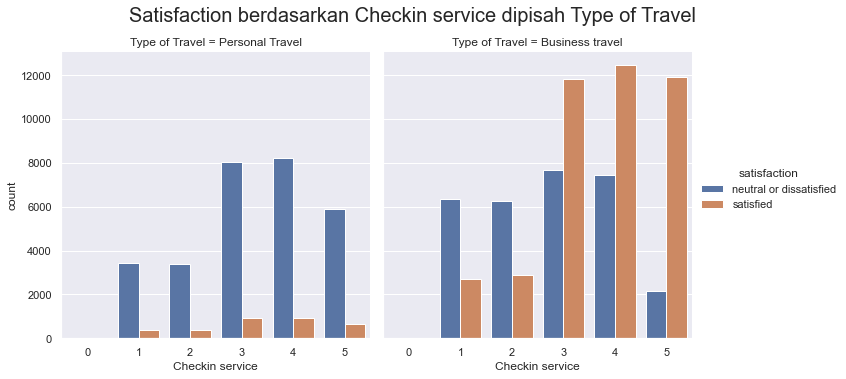

In [83]:
countplot_survey('Checkin service')
countplot_per_bus('Checkin service', None)

- *All Travel* majoritas memilih nilai *4*
- *Personal Travel* masih banyak pelanggan yang *neutral or dissatisfied* yang tetap memilih nilai tinggi
- *Business Travel* masih banyak pelanggan yang *neutral or dissatisfied* yang tetap memilih nilai tinggi

### Inflight service	

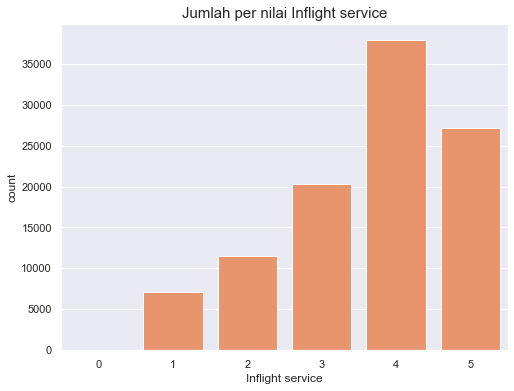

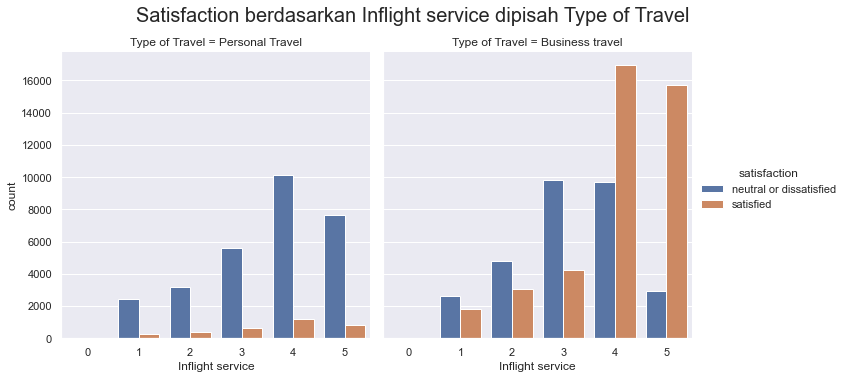

In [84]:
countplot_survey('Inflight service')
countplot_per_bus('Inflight service', None)

- *All Travel* majoritas memilih nilai **4** dan **5**
- *Personal Travel* masih adanya *neutral or dissatisfied* yang memilih nilai tinggi
- *Business Travel* meski nilai 4 memiliki *satisfied* yang tinggi, akan tetapi *neutral or dissatisfied* juga tinggi, meski menurun di nilai **5**

### Cleanliness	

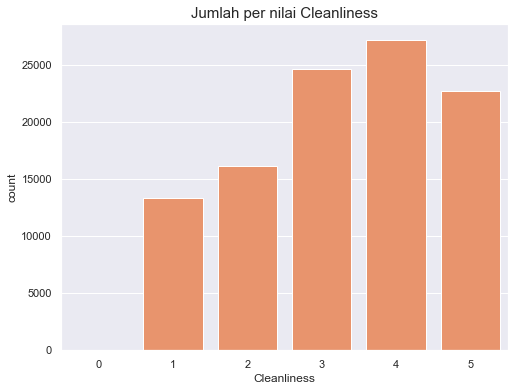

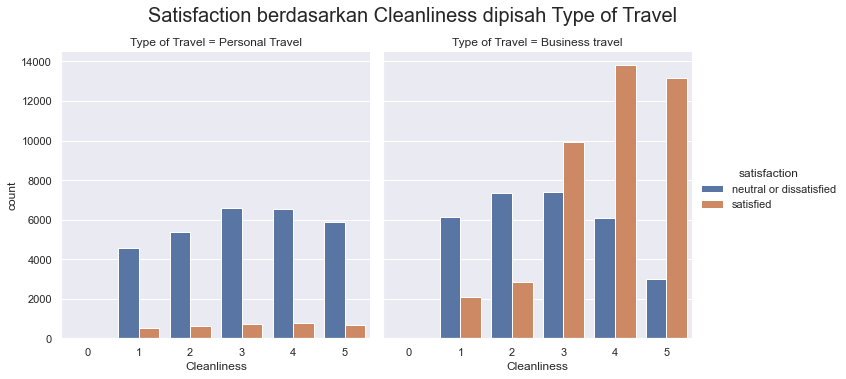

In [85]:
countplot_survey('Cleanliness')
countplot_per_bus('Cleanliness', None)

- *Personal Travel* persebaran data untuk *neutral or dissatisfied* merata untuk semua nilai
- *Business Travel* masih adanya *neutral or dissatisfied* yang memilih nilai-nilai tinggi, meski sudah menurut di nilai tinggi

### Departure Delay in Minutes	

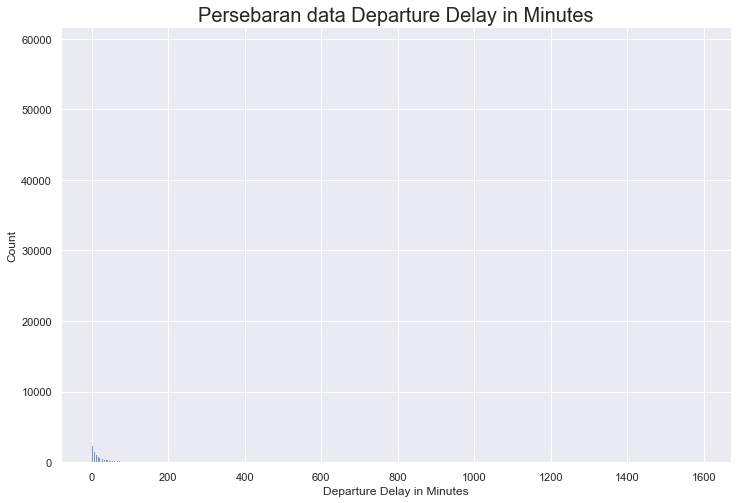

In [86]:
plt.figure(figsize=(12,8))
sns.histplot(data=df, x='Departure Delay in Minutes')
plt.title("Persebaran data Departure Delay in Minutes", size=20)
plt.show()

### Arrival Delay in Minutes	

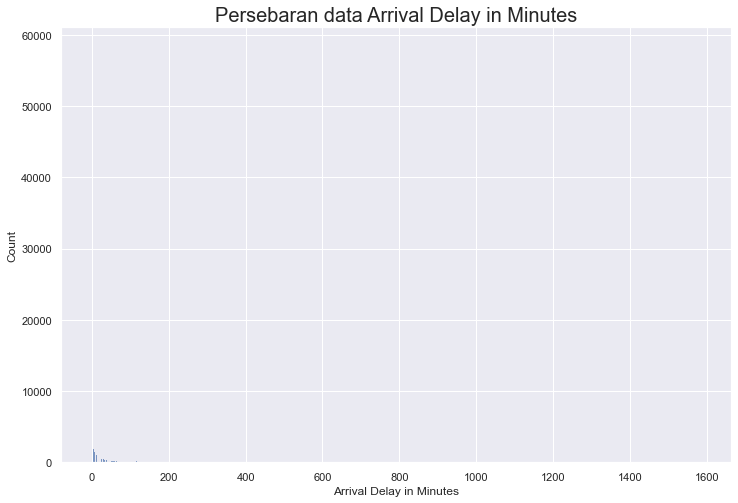

In [87]:
plt.figure(figsize=(12,8))
sns.histplot(data=df, x='Arrival Delay in Minutes')
plt.title("Persebaran data Arrival Delay in Minutes", size=20)
plt.show()

Dikarenakan persebaran, cukup susah untuk memvisualisasi `Departure` dan `Arrival Delay in Minutes`, diperlukan pengelompokan untuk dapat kita analisa

In [88]:
DepartureGroup = []
for i in df['Departure Delay in Minutes']:
    if i == 0 :
        DepartureGroup.append('Delay 0')
    elif i <= 60 :
        DepartureGroup.append('Delay 1 Jam')
    elif i <= 120 :
        DepartureGroup.append('Delay 2 Jam')
    elif i <= 180 : 
        DepartureGroup.append('Delay 3 Jam')
    elif i <= 240 :
        DepartureGroup.append('Delay 4 Jam')
    elif i <= 300 :
        DepartureGroup.append('Delay 5 Jam')
    else : 
        DepartureGroup.append('Lebih dari 5 Jam')

df['DepartureGroup'] = DepartureGroup

In [89]:
ArrivalGroup = []
for i in df['Arrival Delay in Minutes']:
    if i == 0 :
        ArrivalGroup.append('Delay 0')
    elif i <= 60 :
        ArrivalGroup.append('Delay 1 Jam')
    elif i <= 120 :
        ArrivalGroup.append('Delay 2 Jam')
    elif i <= 180 : 
        ArrivalGroup.append('Delay 3 Jam')
    elif i <= 240 :
        ArrivalGroup.append('Delay 4 Jam')
    elif i <= 300 :
        ArrivalGroup.append('Delay 5 Jam')
    else : 
        ArrivalGroup.append('Lebih dari 5 Jam')

df['ArrivalGroup'] = ArrivalGroup

In [90]:
df_personal = df[df['Type of Travel']=='Personal Travel']
df_business = df[df['Type of Travel']=='Business travel']

In [91]:
pivots(df_personal,'DepartureGroup')

DepartureGroup,Delay 0,Delay 1 Jam,Delay 2 Jam,Delay 3 Jam,Delay 4 Jam,Delay 5 Jam,Lebih dari 5 Jam
satisfaction,,,,,,,
neutral or dissatisfied,16027.00,10853.00,1368.00,416.00,183.00,60.00,63.00
satisfied,2202.00,972.00,68.00,27.00,5.00,2.00,3.00
Total,18229.00,11825.00,1436.00,443.00,188.00,62.00,66.00
% of satisfied,12.08,8.22,4.74,6.09,2.66,3.23,4.55


In [92]:
pivots(df_business,'DepartureGroup')

DepartureGroup,Delay 0,Delay 1 Jam,Delay 2 Jam,Delay 3 Jam,Delay 4 Jam,Delay 5 Jam,Lebih dari 5 Jam
satisfaction,,,,,,,
neutral or dissatisfied,15799.00,11548.00,1660.00,533.00,189.00,91.00,89.00
satisfied,24640.00,14624.00,1603.00,509.00,200.00,78.00,92.00
Total,40439.00,26172.00,3263.00,1042.00,389.00,169.00,181.00
% of satisfied,60.93,55.88,49.13,48.85,51.41,46.15,50.83


In [93]:
pivots(df_personal,'ArrivalGroup')

ArrivalGroup,Delay 0,Delay 1 Jam,Delay 2 Jam,Delay 3 Jam,Delay 4 Jam,Delay 5 Jam,Lebih dari 5 Jam
satisfaction,,,,,,,
neutral or dissatisfied,15810.00,10982.00,1452.00,430.00,168.00,59.0,69.00
satisfied,2378.00,785.00,74.00,28.00,9.00,NaN,5.00
Total,18188.00,11767.00,1526.00,458.00,177.00,59.0,74.00
% of satisfied,13.07,6.67,4.85,6.11,5.08,NaN,6.76


In [94]:
pivots(df_business,'ArrivalGroup')

ArrivalGroup,Delay 0,Delay 1 Jam,Delay 2 Jam,Delay 3 Jam,Delay 4 Jam,Delay 5 Jam,Lebih dari 5 Jam
satisfaction,,,,,,,
neutral or dissatisfied,14852.00,12481.00,1642.00,544.00,206.00,96.0,88.00
satisfied,25119.00,14097.00,1615.00,534.00,192.00,96.0,93.00
Total,39971.00,26578.00,3257.00,1078.00,398.00,192.0,181.00
% of satisfied,62.84,53.04,49.59,49.54,48.24,50.0,51.38


Terlihat adanya penurunan setiap delay 1 jam, ini menjadi hal krusial untuk kepuasan pelanggan, karena waktu adalah hal yang berharga

# Kesimpulan

- Melalui data, pelanggan yang puas pada layanan yang ada pada pesawat sebesar 43.33%
- `Customer Type` 
    - *disloyal customer* memiliki tingkat kepuasan **23.67%**, hal ini dapat dimaklumi karena mereka bukan tamu yang setia. Pada pelanggan *loyal customer*, memiliki tingkat kepuasan **47.73%**. lebih dari setengah jumlah tamu yang *Loyal* tidak puas akan layanan yang ada. Jika maskapai ini tidak dapat meningkatkan layanan para pelanggan, bisnis maskapai ini dapat menghadapi masa depan yang kurang baik
- `Age`
    - Rentang umur pelanggan terbanyak ada pada umur 20 sampai 60. Akan tetapi, tingkat kepuasan pelanggan pada umur 20-40 tidak sebanyak pelanggan pada umur 40-60
- `Type of Travel` 
    - Terlihat bahwa pelanggan terbanyak adalah *Business Travel*, dapat dikatakan bahwa maskapai ini memfokuskan layanannya terhadap pelanggan dengan tujuan bisnis, dengan jumlah pelanggan sebanyak 68.9% dari 103.904. Hal ini didukung juga dengan tingkat kepuasan sebesar **58.26%**, berbeda dengan *Personal Travel*, yang hanya memiliki tingkat kepuasan sebesar **10.17%**
- `Class`
    - kelas juga didominasi oleh *Business*, jumlah pelanggan sebesar 49.665 dan tingkat kepuasan sebesar 69.43%. Untuk 2 kelas lainnya *Eco* dan *Eco Plus* tidak memiliki performa sebagus yang pertama, dengan kelas *Eco* jumlah pelanggan yang tidak kalah banyak, yaitu sebesar 46.745 dengan tingkat kepuasan 18.61%. Dan yang terakhir adalah *Eco Plus* dengan jumlah pelanggan 7.494 dengan tingkat kepuasan 24.61%
- `Flight Distance`
    - untuk jarak penerbangan, dibagi menjadi 3 kelas, yaitu *Short Flight*, *Medium Flight* dan *Long Flight*. Meski jumlah penerbangan terbanyak jatuh pada *Short Flight*, yaitu sebanyak 72.394 pelanggan, tingkat kepuasnya hanya 33.51%. Untuk *Long Flight* terdapat 8.273 pelanggan dengan kepuasan 77.42% dan *Medium Flight* dengan 23.237 dan tingkat kepuasan 61.82%
    <br>

Setiap pelanggan diminta oleh tim survey untuk melakukan penilaian setiap layanan yang ada, hanya saja tidak semua tipe layanan yang ada menjadi pertimbangan pelanggan puas atau tidak terhadap penerbangan ini. Berdasarkan data, ada beberapa pelanggan yang *Neutral or Dissatisfied* tetapi memberikan nilai tinggi kepada beberapa layanan dan juga sebaliknya. Hanya saja adanya perbedaan karakter terhadap *Personal* dan *Business Travel*, dimana *Business Travel* lebih sensitif dalam penilaian, ketika mereka puas, mereka tidak segan untuk memberikan nilai tinggi. Sedangkan untuk *Personal*, terdapat persebaran nilai yang merata atau sedikit tinggi walaupun mereka *Neutral or DIssatisfied* terhadap layanan maskapai

- `WiFi` dan `Online Boarding` menjadi fitur yang berpengaruh terhadap penilaian kepada kepuasan pelanggan, terutama `WiFi`, dimana nilai **5** memiliki nilai kepuasan 100% untuk *Personal Travel* dan 98.96% untuk *Business Travel*. Dan untuk `Online Boarding` untuk nilai 5 mendapat tingkat kepuasan 98.61% untuk *Business Travel*

- Adanya beberapa fitur(`Baggage handling`, `Checkin service`, `Inflight service` dan `Cleanliness`) yang tidak menjadi pertimbangan yang kuat untuk `satisfaction` mereka, dikarenakan meski mereka *neutral or dissatisfied*, mereka tetap memberikan nilai tinggi pada layanan tersebut
- `Arrival/Departure Delay` memiliki pengaruh terhadap tingkat kepuasan, setiap 1 jam maskapai melakukan delay, tingkat kepuasan pelanggan mengalami penurunan

## Rekomendasi
- Memberikan points terhadap pelanggan yang sering menggunakan maskapai ini, dengan harapan mengubah pelanggan yang *disloyal* menjadi *loyal* dan juga saat seiring waktu berjalan, mereka akan merasakan perkembangan layanan yang ada
- Perlunya peningkatan layanan yang ada pada pelanggan di kelas *Eco* maupun *Eco Plus* untuk menjaga 50% pelanggan yang menggunakan kelas tersebut
- Menawarkan Ticket Upgrade bagi mereka yang memiliki tujuan *Business Travel* untuk meningkatkan pengalaman terbang mereka
- Meningkatkan `WiFi` untuk membuat pengalaman terbang pelanggan menjadi lebih baik
- Meningkatkan UI/UX untuk meningkatkan kemundahan `Online Boarding`
- Mengubah cara penilaian survey dari yang memiliki nilai tengah menjadi tidak ada, untuk menghilangkan pelanggan yang memberikan penilaian *Netral*, sehingga pihak maskapai dapat memberikan perlakuan secepatnya untuk membuat layanan dalam pesawat menjadi lebih baik.


Adanya beberapa Feature penting yang diperlukan jika menginginkan analisa lebih lanjut, yaitu :
- `Airplane Type`
- `Ticket Price`
- `Departure Time`

In [95]:
df.to_excel('airplane_clean2.xlsx')